# Submission 1: Classical Denoising
Implementation of the following:
1. Median Filter: Replace each pixel with the median value of its neighboring pixels

2. Mean Filter: Replace each pixel with the mean value of its neighboring pixels

3. Bilateral Filter: Preserves edges while reducing noise by taking into account both spatial and intensity differences.

4. Gaussian Blur: Apply a convolution operation using a gaussian kernel to smoothen the image

### Load Image

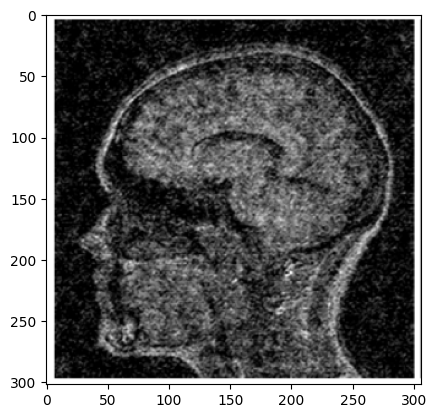

In [2]:
import cv2 as cv
import matplotlib.pyplot as pyplot

img = cv.imread("images/noisy.png")
pyplot.imshow(img)

### Median Filter

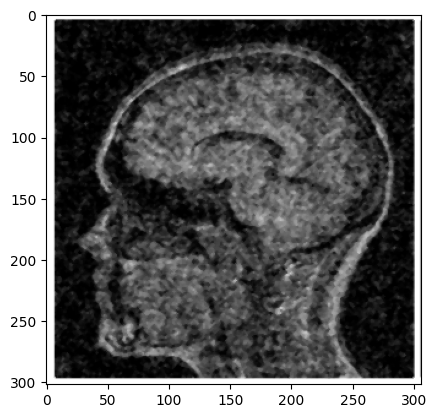

In [6]:
kernel_size = 3
median_filter = cv.medianBlur(img, kernel_size)

pyplot.imshow(median_filter)

### Mean Filter

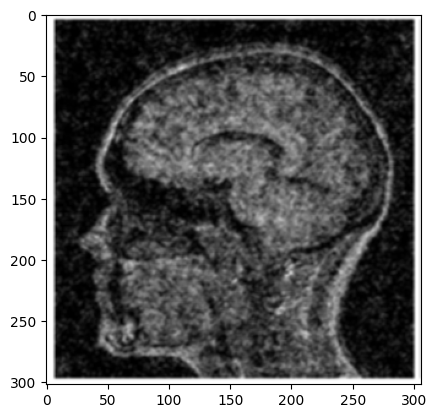

In [8]:
kernel_size = [3, 3]
mean_filter = cv.blur(img, kernel_size)

pyplot.imshow(mean_filter)

### Bilateral Filter

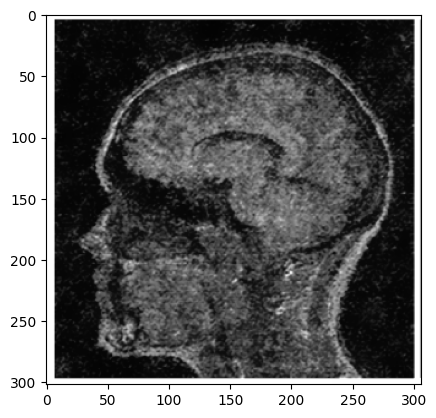

In [22]:
#dearest lord i do not understand how bilateral filtering works
size = 25
sigma_color = 50
sigma_space = 50
bilateral_filter = cv.bilateralFilter(img, size, sigma_color, sigma_space)

pyplot.imshow(bilateral_filter)

### Gaussian Blur

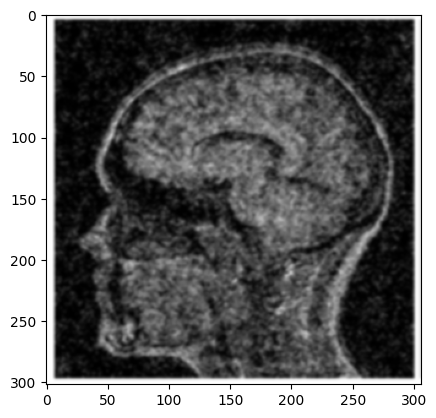

In [23]:
kernel_size = [5, 5]
std_dev = 0 #passing 0 will make function auto compute std dev
gauss_blur = cv.GaussianBlur(img,kernel_size,std_dev)
pyplot.imshow(gauss_blur)

## Evaluating denoising techniques

In [ ]:
hi

**Which method had the best score? Why do you think this denoising method performed the best (explain in terms of its inherent steps / properties)?**

{Answer}